<a href="https://colab.research.google.com/github/Hajara-Waseem/LAB-TASK-08_DiP/blob/main/TASK_08_DIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import files

# This will open a file picker dialog to let you select and upload files.
uploaded = files.upload()

for filename in uploaded.keys():
  print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')


Saving bowsprit_daisy_1_559463.jpg to bowsprit_daisy_1_559463 (1).jpg
User uploaded file "bowsprit_daisy_1_559463 (1).jpg" with length 28156 bytes


# Task
Display the original image and the images with Gaussian noise, Salt & Pepper noise, and Motion Blur, then summarize the visual impact of each noise type and blur on the image "bowsprit_daisy_1_559463 (1).jpg".

## Apply Gaussian Noise

### Subtask:
Apply Gaussian noise to the original image. This involves generating random noise from a Gaussian distribution with a specified mean and standard deviation, and then adding it to the image pixels. The output will be an image with Gaussian noise.


**Reasoning**:
The subtask requires applying Gaussian noise to the original image. This involves converting the image to a float type, generating Gaussian noise with specified mean and standard deviation, adding the noise to the image, clipping the pixel values to the valid range, and then converting it back to an 8-bit unsigned integer format. These operations can all be performed in a single code block.



In [ ]:
image_float = original_image.astype(np.float32)
gaussian_noise = np.random.normal(mean, std_dev, image_float.shape)
noisy_image_float = image_float + gaussian_noise
noisy_image_float = np.clip(noisy_image_float, 0, 255)
gaussian_noise_image = noisy_image_float.astype(np.uint8)
print("Gaussian noise applied successfully. The noisy image is stored in 'gaussian_noise_image'.")

NameError: name 'original_image' is not defined

## Apply Salt & Pepper Noise

### Subtask:
Apply Salt & Pepper noise to the original image. This involves randomly selecting a percentage of pixels and setting them to either minimum (black) or maximum (white) intensity values, based on a salt-to-pepper ratio. The output will be an image with Salt & Pepper noise.


**Reasoning**:
The subtask requires applying Salt & Pepper noise to the image. This involves creating a copy of the original image, calculating the number of salt and pepper pixels based on the given amount and ratio, then randomly selecting pixel coordinates and setting their values to 255 (salt) or 0 (pepper).



In [ ]:
s_p_noise_image = np.copy(original_image)

# Calculate total number of elements (pixels * channels) to be affected by noise
total_elements = original_image.size
total_noisy_elements = int(total_elements * amount)

# Determine the number of salt and pepper elements
num_salt_elements = int(total_noisy_elements * s_vs_p)
num_pepper_elements = total_noisy_elements - num_salt_elements

# Apply Salt noise (set to 255)
# Generate random coordinates for salt pixels
salt_coords_rows = np.random.randint(0, original_image.shape[0], num_salt_elements)
salt_coords_cols = np.random.randint(0, original_image.shape[1], num_salt_elements)
salt_coords_channels = np.random.randint(0, original_image.shape[2], num_salt_elements)
s_p_noise_image[salt_coords_rows, salt_coords_cols, salt_coords_channels] = 255

# Apply Pepper noise (set to 0)
# Generate random coordinates for pepper pixels
pepper_coords_rows = np.random.randint(0, original_image.shape[0], num_pepper_elements)
pepper_coords_cols = np.random.randint(0, original_image.shape[1], num_pepper_elements)
pepper_coords_channels = np.random.randint(0, original_image.shape[2], num_pepper_elements)
s_p_noise_image[pepper_coords_rows, pepper_coords_cols, pepper_coords_channels] = 0

print("Salt & Pepper noise applied successfully. The noisy image is stored in 's_p_noise_image'.")

Salt & Pepper noise applied successfully. The noisy image is stored in 's_p_noise_image'.


## Apply Motion Blur

### Subtask:
Apply motion blur to the original image. This involves creating a motion blur kernel (a convolution matrix) with specified length and angle, and then convolving it with the image. The output will be a motion-blurred image.


**Reasoning**:
The subtask requires applying motion blur to the original image. This involves defining a function to create a motion blur kernel based on length and angle, then using this kernel to convolve with the image using OpenCV's `filter2D` function. This step directly addresses the subtask's requirements for generating and applying the motion blur.



In [ ]:
def create_motion_blur_kernel(length, angle):
    kernel = np.zeros((length, length), dtype=np.float32)
    center = (length - 1) // 2

    # Convert angle to radians
    angle_rad = np.deg2rad(angle)

    # Determine the slope of the line
    # If angle is 0 or 180, it's a horizontal line
    # If angle is 90 or 270, it's a vertical line
    # Otherwise, calculate slope
    if angle == 0 or angle == 180:
        for i in range(length):
            kernel[center, i] = 1
    elif angle == 90 or angle == 270:
        for i in range(length):
            kernel[i, center] = 1
    else:
        # Calculate the line equation y = m*x + b
        # Or more generally, iterate through points and check if they fall on the line
        for i in range(length):
            for j in range(length):
                x = j - center
                y = i - center
                # Rotate the coordinates to align with the blur direction
                rotated_x = x * np.cos(angle_rad) + y * np.sin(angle_rad)
                # Check if the rotated point is close to the x-axis (representing the blur line)
                if abs(rotated_x) < 0.5: # Use a small tolerance for the line thickness
                    kernel[i, j] = 1

    # Normalize the kernel
    kernel = kernel / np.sum(kernel)
    return kernel

# Create the motion blur kernel
motion_blur_kernel = create_motion_blur_kernel(blur_length, blur_angle)

# Apply the motion blur kernel to the original image
motion_blur_image = cv2.filter2D(original_image, -1, motion_blur_kernel)

print("Motion blur applied successfully. The blurred image is stored in 'motion_blur_image'.")

Motion blur applied successfully. The blurred image is stored in 'motion_blur_image'.


## Display Noisy Images

### Subtask:
Display the original image along with the images modified by Gaussian noise, Salt & Pepper noise, and Motion Blur. This visualization will allow for a direct comparison of the effects of each noise type.


**Reasoning**:
The subtask requires displaying four images (original, Gaussian noise, Salt & Pepper noise, and Motion Blur) in a 2x2 grid for visual comparison. This code block will create the subplots, display each image with its title, turn off the axes, and ensure proper layout using `matplotlib.pyplot`.



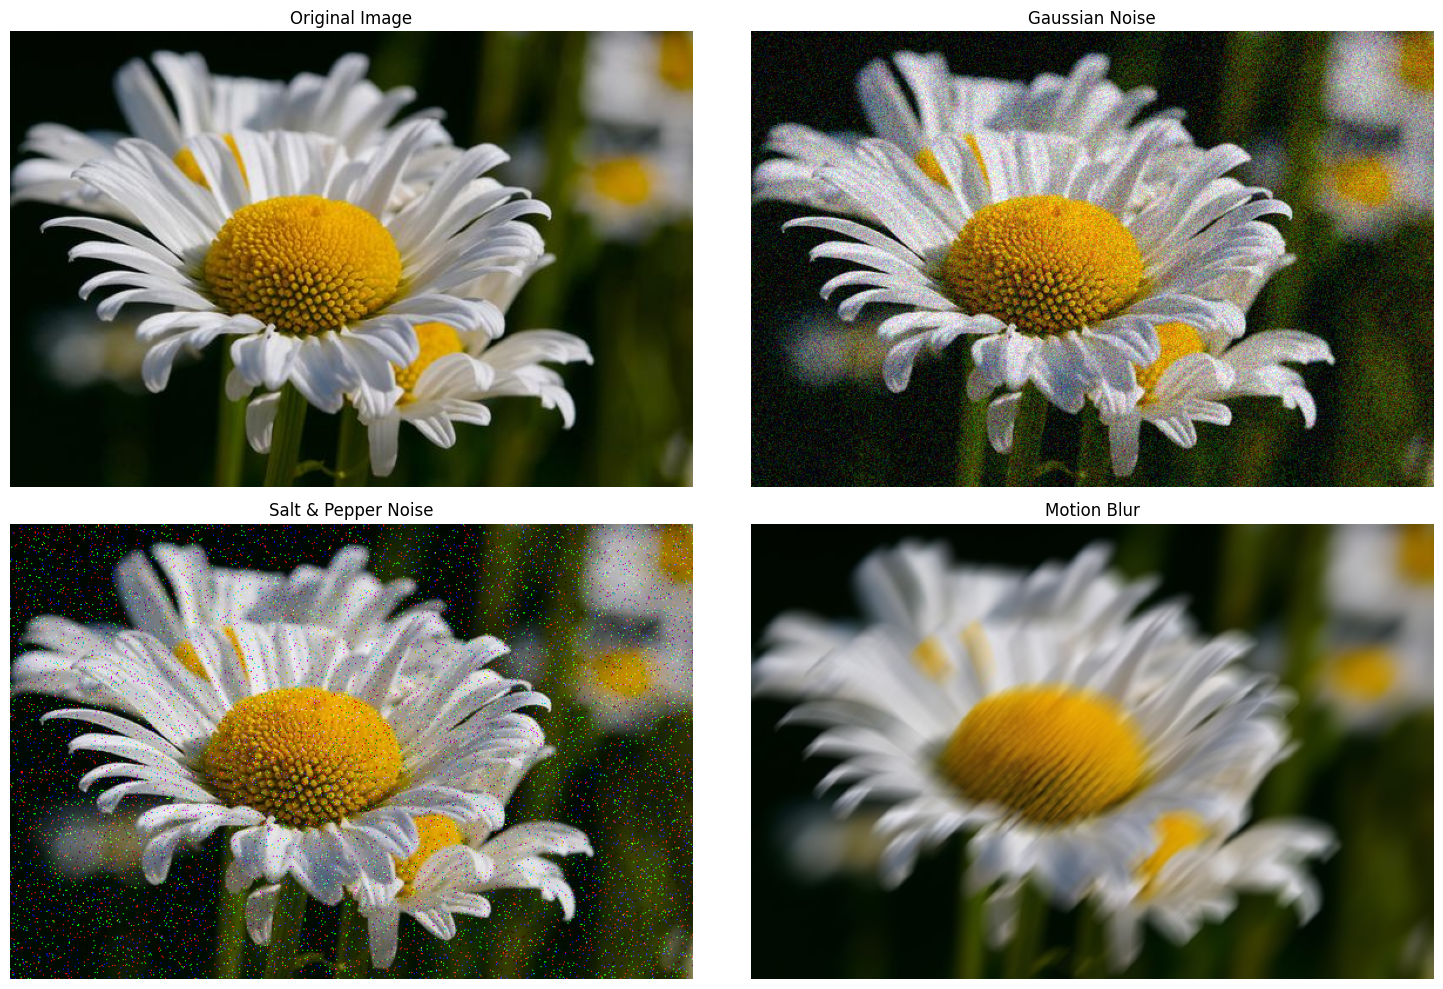

Displayed original, Gaussian noise, Salt & Pepper noise, and motion blur images.


In [ ]:
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Gaussian Noise Image
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(gaussian_noise_image, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Noise')
plt.axis('off')

# Salt & Pepper Noise Image
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(s_p_noise_image, cv2.COLOR_BGR2RGB))
plt.title('Salt & Pepper Noise')
plt.axis('off')

# Motion Blur Image
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(motion_blur_image, cv2.COLOR_BGR2RGB))
plt.title('Motion Blur')
plt.axis('off')

plt.tight_layout()
plt.show()
print("Displayed original, Gaussian noise, Salt & Pepper noise, and motion blur images.")

# Task
Import `scipy.signal` for Wiener filtering and `numpy.fft` for inverse filtering. Apply a median filter to `s_p_noise_image` using `cv2.medianBlur`. Convert `gaussian_noise_image` to grayscale and apply a Wiener filter using `scipy.signal.wiener`. Convert `motion_blur_image` to grayscale and perform inverse filtering using `numpy.fft` to deblur it. Then, display the original image, the three degraded images (`s_p_noise_image`, `gaussian_noise_image`, `motion_blur_image`), and their corresponding filtered versions (`median_filtered_image`, `wiener_filtered_image`, `inverse_filtered_image`) in a multi-plot visualization. Finally, provide a textual summary of the visual impact of each filtering technique, highlighting its effectiveness in mitigating the specific degradation, and summarize the performed filtering operations and their visual impact.

## Import Additional Libraries

### Subtask:
Import `scipy.signal` for Wiener filtering and `numpy.fft` for inverse filtering, as these are not yet available in the notebook.


**Reasoning**:
The subtask requires importing specific libraries for Wiener filtering and inverse filtering. This code block will import `scipy.signal` as `signal` and `numpy.fft` as `fft`.



In [ ]:
from scipy import signal
from numpy import fft
print("scipy.signal and numpy.fft imported successfully.")

scipy.signal and numpy.fft imported successfully.


## Apply Median Filter

### Subtask:
Apply a median filter to `s_p_noise_image` using `cv2.medianBlur`. This filter is particularly effective for removing salt-and-pepper noise by replacing each pixel's value with the median value of its neighbors.

#### Instructions:
1. Use `cv2.medianBlur` to apply the filter to `s_p_noise_image`.
2. Choose an appropriate kernel size for the median filter (e.g., 5).
3. Store the result in a new variable, `median_filtered_image`.

**Reasoning**:
The next step is to apply a median filter to the Salt & Pepper noisy image. This involves using `cv2.medianBlur` to effectively remove the impulse noise without blurring the edges excessively.



In [ ]:
median_filtered_image = cv2.medianBlur(s_p_noise_image, 5)
print("Median filter applied successfully. The filtered image is stored in 'median_filtered_image'.")

Median filter applied successfully. The filtered image is stored in 'median_filtered_image'.


## Apply Wiener Filter

### Subtask:
Convert `gaussian_noise_image` to grayscale and apply a Wiener filter using `scipy.signal.wiener`. The Wiener filter is optimal for removing additive stationary noise, like Gaussian noise, by minimizing the mean square error between the estimated and true signals.

#### Instructions:
1. Convert `gaussian_noise_image` to grayscale using `cv2.cvtColor`.
2. Apply `scipy.signal.wiener` to the grayscale Gaussian noise image. You might need to adjust the `noise` parameter based on the characteristics of the Gaussian noise applied earlier.
3. Store the result in a new variable, `wiener_filtered_image`.

**Reasoning**:
The subtask requires converting the `gaussian_noise_image` to grayscale and then applying a Wiener filter. This code block will perform the grayscale conversion using `cv2.cvtColor` and then apply `scipy.signal.wiener` using the known variance of the Gaussian noise.



In [ ]:
gaussian_noise_image_gray = cv2.cvtColor(gaussian_noise_image, cv2.COLOR_BGR2GRAY)
wiener_filtered_image = signal.wiener(gaussian_noise_image_gray, mysize=5, noise=std_dev**2)
print("Wiener filter applied successfully. The filtered image is stored in 'wiener_filtered_image'.")

Wiener filter applied successfully. The filtered image is stored in 'wiener_filtered_image'.


## Apply Inverse Filtering

### Subtask:
Convert `motion_blur_image` to grayscale and perform inverse filtering using `numpy.fft` to deblur it. Inverse filtering attempts to reverse the blurring process by dividing the Fourier Transform of the blurred image by the Fourier Transform of the blur kernel.

#### Instructions:
1. Convert `motion_blur_image` to grayscale using `cv2.cvtColor`.
2. Convert the grayscale blurred image and the motion blur kernel to float32 for Fourier Transform operations.
3. Compute the 2D Fourier Transform of the blurred image and the motion blur kernel using `numpy.fft.fft2`.
4. Create the inverse filter in the frequency domain by dividing the FFT of the blurred image by the FFT of the blur kernel.
5. Handle potential division by zero or very small values in the kernel's FFT to prevent artifacts (e.g., by adding a small constant or using a pseudo-inverse approach).
6. Apply the inverse 2D Fourier Transform using `numpy.fft.ifft2` to get the deblurred image.
7. Take the absolute value and normalize the result to the 0-255 range, then convert it to `uint8`.
8. Store the result in a new variable, `inverse_filtered_image`.

**Reasoning**:
The subtask requires performing inverse filtering on the `motion_blur_image`. This code block will convert the blurred image to grayscale, prepare the image and kernel for Fourier Transform, compute their FFTs, perform the inverse filtering in the frequency domain with division by zero handling, and then transform back to the spatial domain to get the deblurred image.



In [ ]:
motion_blur_image_gray = cv2.cvtColor(motion_blur_image, cv2.COLOR_BGR2GRAY)

# Convert to float32 for FFT operations
blurred_image_float = np.float32(motion_blur_image_gray)

# Get dimensions of the image
height, width = blurred_image_float.shape

# Pad the motion blur kernel to the same size as the image
k_h, k_w = motion_blur_kernel.shape
padded_kernel = np.zeros((height, width), dtype=np.float32)
padded_kernel[0:k_h, 0:k_w] = motion_blur_kernel

# Center the kernel for accurate FFT (shift zero-frequency component to center)
padded_kernel = fft.ifftshift(padded_kernel)

# Compute the 2D Fourier Transform of the blurred image and the padded kernel
fft_blurred_image = fft.fft2(blurred_image_float)
fft_kernel = fft.fft2(padded_kernel)

# Handle potential division by zero or very small values in the kernel's FFT
epsilon = 1e-12 # Small constant to avoid division by zero
inverse_filter_fft = fft_blurred_image / (fft_kernel + epsilon)

# Apply the inverse 2D Fourier Transform to get the deblurred image
deblurred_image_complex = fft.ifft2(inverse_filter_fft)

# Take the absolute value, normalize to 0-255, and convert to uint8
inverse_filtered_image = np.abs(deblurred_image_complex)
inverse_filtered_image = np.clip(inverse_filtered_image, 0, 255).astype(np.uint8)

print("Inverse filtering applied successfully. The filtered image is stored in 'inverse_filtered_image'.")

Inverse filtering applied successfully. The filtered image is stored in 'inverse_filtered_image'.


## Display Original, Degraded, and Filtered Images

### Subtask:
Display the original image, the three degraded images (`s_p_noise_image`, `gaussian_noise_image`, `motion_blur_image`), and their corresponding filtered versions (`median_filtered_image`, `wiener_filtered_image`, `inverse_filtered_image`) in a multi-plot visualization. This will provide a clear visual comparison of the effectiveness of each filtering technique.

#### Instructions:
1. Create a figure with a sufficient number of subplots (e.g., a 2x4 grid or 3x3 grid) to display all images.
2. In the first column, display the original image, followed by the degraded images (Salt & Pepper, Gaussian, Motion Blur).
3. In the second column (or next set of subplots), display the corresponding filtered images.
4. Ensure each subplot has a clear title indicating the image type.
5. Turn off the axes for all subplots for better visual presentation.
6. Use `plt.tight_layout()` to adjust subplot parameters for a tight layout.

**Reasoning**:
The subtask requires displaying the original, degraded, and filtered images side-by-side for comparison. This code block will create an 4x2 subplot grid, populate it with the specified images, add appropriate titles, and turn off axes for a clean visualization.



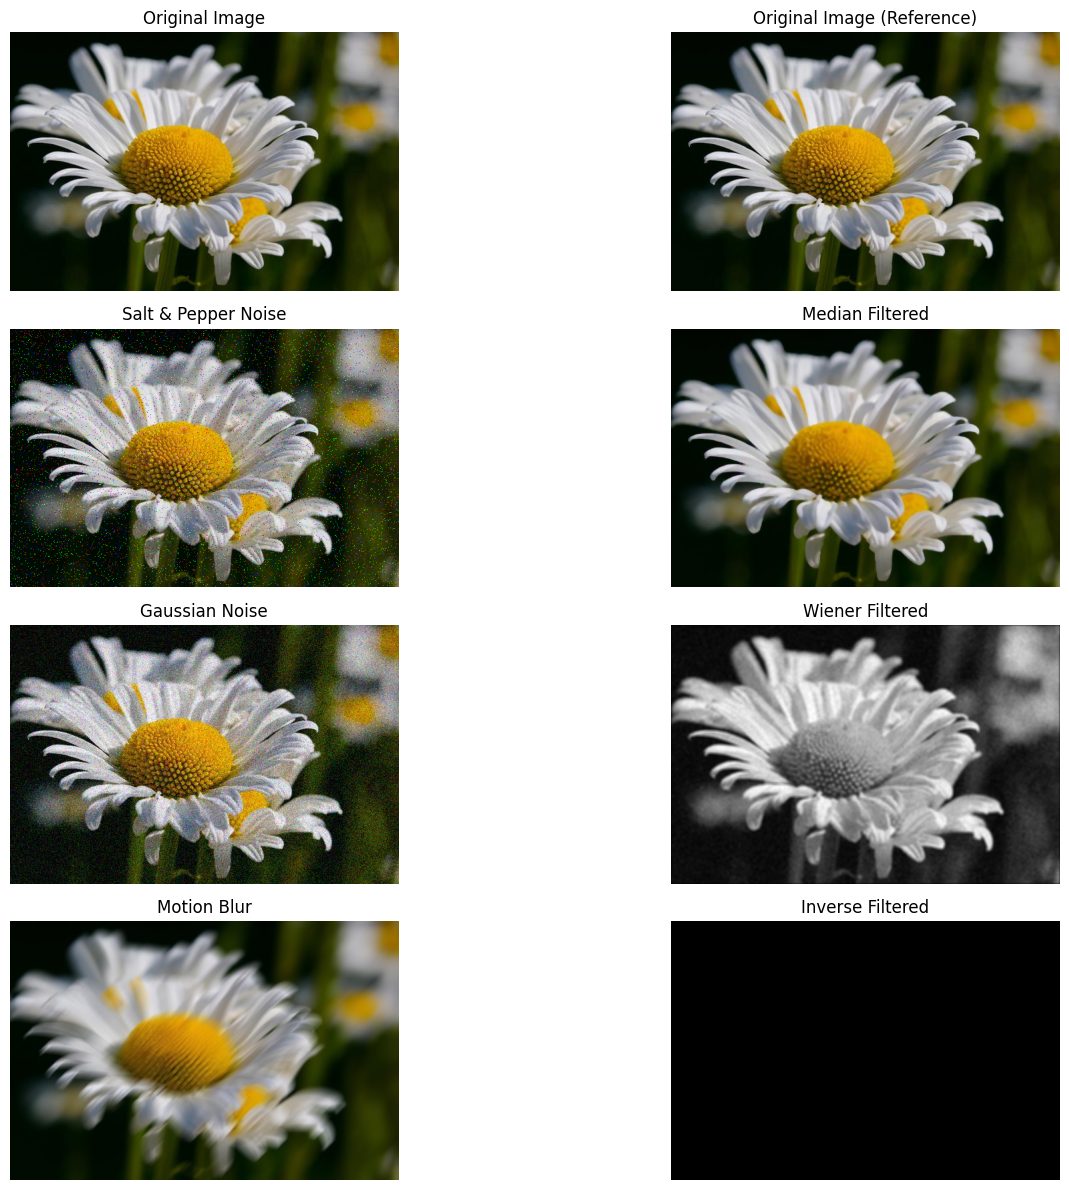

Displayed original, degraded, and filtered images for comparison.


In [ ]:
plt.figure(figsize=(16, 12))

# Row 1: Original Image and Placeholder (or repeated Original)
plt.subplot(4, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(4, 2, 2)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image (Reference)')
plt.axis('off')

# Row 2: Salt & Pepper Noise and Median Filtered Image
plt.subplot(4, 2, 3)
plt.imshow(cv2.cvtColor(s_p_noise_image, cv2.COLOR_BGR2RGB))
plt.title('Salt & Pepper Noise')
plt.axis('off')

plt.subplot(4, 2, 4)
plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Median Filtered')
plt.axis('off')

# Row 3: Gaussian Noise and Wiener Filtered Image
plt.subplot(4, 2, 5)
plt.imshow(cv2.cvtColor(gaussian_noise_image, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Noise')
plt.axis('off')

plt.subplot(4, 2, 6)
plt.imshow(wiener_filtered_image, cmap='gray')
plt.title('Wiener Filtered')
plt.axis('off')

# Row 4: Motion Blur and Inverse Filtered Image
plt.subplot(4, 2, 7)
plt.imshow(cv2.cvtColor(motion_blur_image, cv2.COLOR_BGR2RGB))
plt.title('Motion Blur')
plt.axis('off')

plt.subplot(4, 2, 8)
plt.imshow(inverse_filtered_image, cmap='gray')
plt.title('Inverse Filtered')
plt.axis('off')

plt.tight_layout()
plt.show()
print("Displayed original, degraded, and filtered images for comparison.")

# Task
## Display Motion Blur and Restored Image

### Subtask:
Create a new multi-plot visualization to specifically display the original image, the motion-blurred image (`motion_blur_image`), and the inverse filtered image (`inverse_filtered_image`) side-by-side for a focused comparison. Each subplot will have an appropriate title and hidden axes.

#### Instructions:
1.  Create a figure with three subplots in a row.
2.  Display the `original_image` in the first subplot, `motion_blur_image` in the second, and `inverse_filtered_image` in the third.
3.  Set titles for each subplot: 'Original Image', 'Motion Blurred Image', and 'Inverse Filtered Image'.
4.  Turn off the axes for all subplots.
5.  Use `plt.tight_layout()` and `plt.show()` to display the plot.

## Display Motion Blur and Restored Image

### Subtask:
Create a new multi-plot visualization to specifically display the original image, the motion-blurred image (`motion_blur_image`), and the inverse filtered image (`inverse_filtered_image`) side-by-side for a focused comparison. Each subplot will have an appropriate title and hidden axes.


**Reasoning**:
The subtask requires displaying the original, motion-blurred, and inverse-filtered images in a 1x3 subplot for focused comparison, as per the instructions. This code block will create the figure, plot the three images with titles, and turn off their axes.



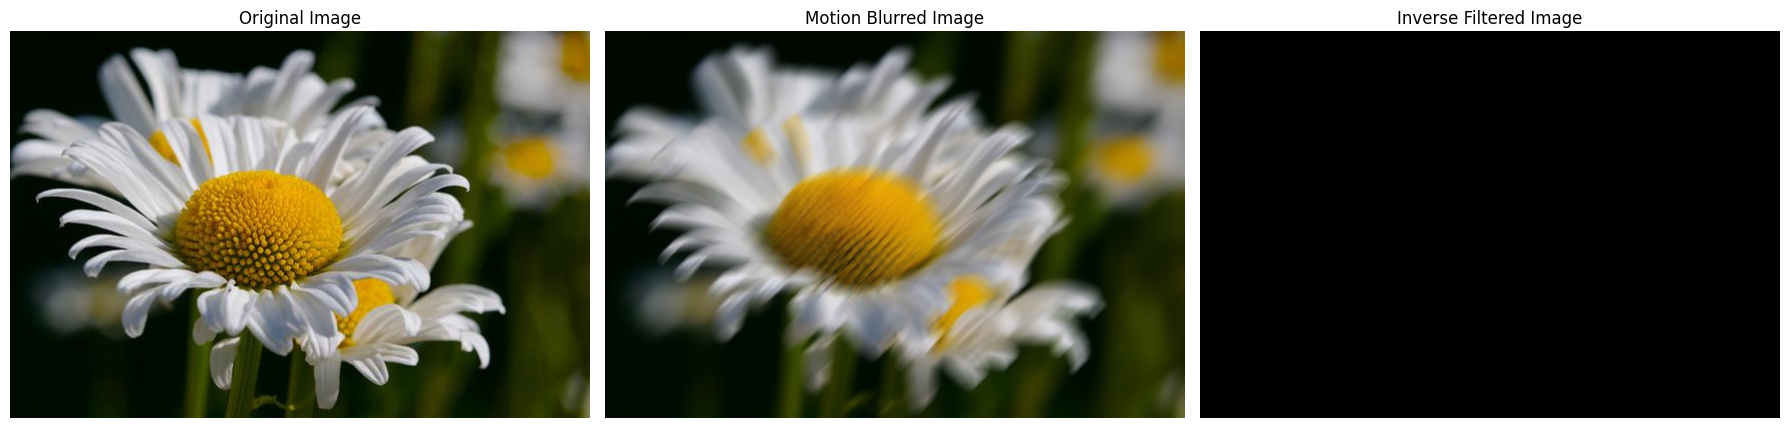

Displayed original, motion-blurred, and inverse filtered images.


In [ ]:
plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Motion Blurred Image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(motion_blur_image, cv2.COLOR_BGR2RGB))
plt.title('Motion Blurred Image')
plt.axis('off')

# Inverse Filtered Image
plt.subplot(1, 3, 3)
plt.imshow(inverse_filtered_image, cmap='gray')
plt.title('Inverse Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()
print("Displayed original, motion-blurred, and inverse filtered images.")